In [1]:
include("Main_module.jl")
using .TDQMC
using PyPlot, Distributions, Random

In [2]:
P = Parameter{Float64,Int64}()
Dy = Dynamics{Float64}();

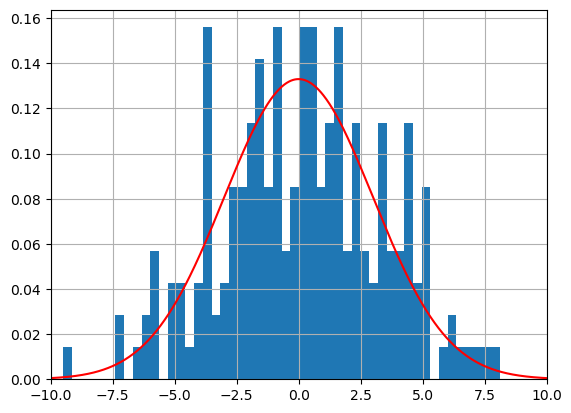

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\86187\.julia\packages\PyCall\3fwVL\src\numpy.jl:67


(-10.0, 10.0)

In [3]:
hist(Dy.Trajectory', 50, density = true);
plot(P.sampling, pdf(Normal(0, 3), P.sampling), color = "red")
grid()
xlim(-10, 10)

In [4]:
parallel_CTR!(P, Dy)

[1, 0, 0, 0]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 1, 1]
[2, 1, 1, 1]
[2, 2, 1, 1]
[2, 2, 1, 2]
[2, 2, 2, 2]
[3, 2, 2, 2]
[3, 3, 2, 2]
[3, 3, 2, 3]
[3, 3, 3, 3]
[3, 4, 3, 3]
[3, 4, 4, 3]
[4, 4, 4, 3]
[4, 4, 4, 4]
[4, 5, 4, 4]
[4, 5, 5, 4]
[5, 5, 5, 4]
[5, 5, 5, 5]
[5, 5, 6, 5]
[6, 5, 6, 5]
[6, 6, 6, 5]
[6, 6, 6, 6]
[6, 6, 7, 6]
[7, 6, 7, 6]
[7, 7, 7, 6]
[7, 7, 7, 7]
[7, 7, 7, 8]
[8, 7, 7, 8]
[8, 8, 7, 8]
[8, 8, 8, 8]
[8, 8, 8, 9]
[8, 8, 9, 9]
[9, 8, 9, 9]
[9, 9, 9, 9]
[9, 10, 9, 9]
[9, 10, 10, 9]
[10, 10, 10, 9]
[10, 10, 10, 10]
[10, 11, 10, 10]
[10, 11, 11, 10]
[11, 11, 11, 10]
[11, 11, 11, 11]
[11, 11, 12, 11]
[11, 11, 12, 12]
[11, 12, 12, 12]
[12, 12, 12, 12]
[12, 12, 13, 12]
[12, 12, 13, 13]
[12, 13, 13, 13]
[13, 13, 13, 13]
[14, 13, 13, 13]
[14, 13, 13, 14]
[14, 14, 13, 14]
[14, 14, 14, 14]
[14, 14, 14, 15]
[15, 14, 14, 15]
[15, 15, 14, 15]
[15, 15, 15, 15]
[15, 15, 15, 16]
[16, 15, 15, 16]
[16, 16, 15, 16]
[16, 16, 16, 16]
[16, 16, 16, 17]
[17, 16, 16, 17]
[17, 16, 17, 17]
[17, 17, 17

In [6]:
using DataFrames, CSV
df = CSV.read("Ground_Wave_Func.csv", DataFrame)
df.wave = @. real(parse(Complex{Float64}, df.wave))

20001-element Vector{Float64}:
 1.1110523894453942e-15
 1.126714462768829e-15
 1.1151255463373956e-15
 1.0960310192892259e-15
 1.1043909637021962e-15
 1.096314727810028e-15
 1.0776968646269636e-15
 1.1032404449202764e-15
 1.0938574723245351e-15
 1.0849673934826716e-15
 1.0816200942518743e-15
 1.0837449096125486e-15
 1.0754001676147728e-15
 ⋮
 1.180968988896895e-15
 1.1649967443657957e-15
 1.148401704064087e-15
 1.1493675292280298e-15
 1.1646359753265938e-15
 1.162362931175561e-15
 1.1602418902076246e-15
 1.1507581622946283e-15
 1.1498347780801389e-15
 1.1360058853718269e-15
 1.1249116240775495e-15
 1.1242458211985764e-15

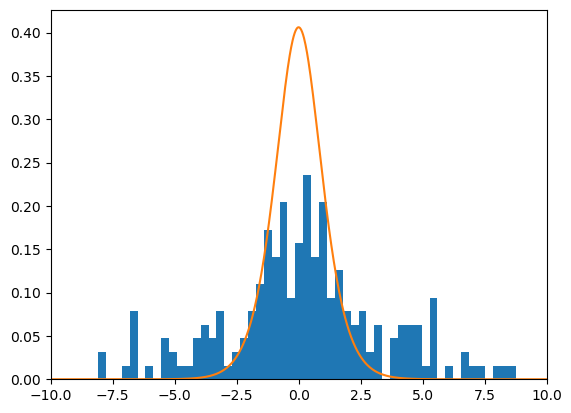

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [14]:
hist(Dy.Trajectory', 60, density = true)
plot(P.sampling, abs2.(Dy.Guide_Wave[1]))
xlim(-10, 10)
show()

In [17]:
sum(Dy.Energy)/length(Dy.Energy)

-0.26731356868455886

In [33]:
wave = DataFrame()
wave.x = P.sampling
wave.wave_1 = sum(abs, hcat(Dy.Guide_Wave[1, :]...), dims = 2)[:] / size(Dy.Guide_Wave, 2)
CSV.write("Ground_Guide_Wave.csv", wave)

"Ground_Guide_Wave.csv"

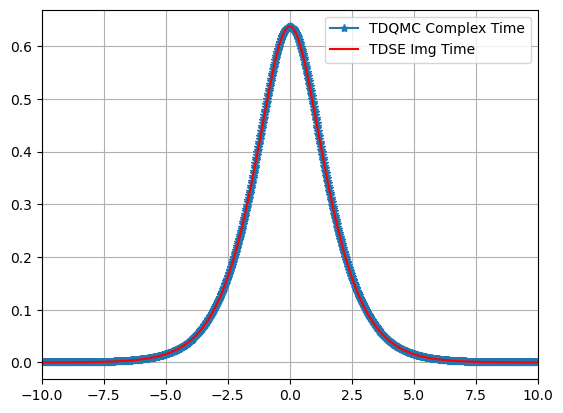

In [32]:
plot(P.sampling, abs.(wave.wave_1),marker="*", label = "TDQMC Complex Time")
plot(P.sampling, abs.(df.wave), color = "red", label = "TDSE Img Time")
legend()
xlim(-10, 10)
grid()

In [7]:
Dy.Time

200-element Vector{Union{Float64, ComplexF64}}:
             112.15 - 22.43im
 124.30000000000001 - 24.86im
 124.30000000000001 - 24.86im
              153.9 - 30.78im
             145.35 - 29.07im
             121.25 - 24.25im
 142.45000000000002 - 28.490000000000002im
 133.45000000000002 - 26.69im
 124.30000000000001 - 24.86im
             118.25 - 23.650000000000002im
             130.35 - 26.07im
 139.45000000000002 - 27.89im
 124.30000000000001 - 24.86im
                    ⋮
 124.30000000000001 - 24.86im
             121.25 - 24.25im
             109.15 - 21.830000000000002im
              130.4 - 26.080000000000002im
              133.4 - 26.68im
              139.5 - 27.900000000000002im
 142.45000000000002 - 28.490000000000002im
             130.35 - 26.07im
              133.4 - 26.68im
 139.45000000000002 - 27.89im
              115.2 - 23.04im
              133.4 - 26.68im

In [13]:
Dy.Trajectory

1×200 Matrix{Float64}:
 -0.150393  1.14173  -1.79605  8.11132  …  -6.07555  0.291195  -2.46381

In [15]:
Dy.Guide_Wave

1×200 Matrix{Vector{ComplexF64}}:
 [1.31934e-25-1.02577e-24im, 2.63716e-25-2.05127e-24im, 3.95192e-25-3.07627e-24im, 5.26211e-25-4.10048e-24im, 6.56621e-25-5.12367e-24im, 7.86269e-25-6.14556e-24im, 9.15004e-25-7.16591e-24im, 1.04267e-24-8.18445e-24im, 1.16913e-24-9.20093e-24im, 1.29422e-24-1.02151e-23im  …  1.29422e-24-1.02151e-23im, 1.16913e-24-9.20093e-24im, 1.04267e-24-8.18445e-24im, 9.15004e-25-7.16591e-24im, 7.86269e-25-6.14556e-24im, 6.56621e-25-5.12367e-24im, 5.26211e-25-4.10048e-24im, 3.95192e-25-3.07627e-24im, 2.63716e-25-2.05127e-24im, 1.31934e-25-1.02577e-24im]  …  [4.00598e-27-5.43707e-26im, 8.0069e-27-1.08732e-25im, 1.19977e-26-1.63073e-25im, 1.59733e-26-2.17385e-25im, 1.99287e-26-2.71658e-25im, 2.38587e-26-3.25882e-25im, 2.77585e-26-3.80048e-25im, 3.16229e-26-4.34145e-25im, 3.54469e-26-4.88164e-25im, 3.92255e-26-5.42095e-25im  …  3.92255e-26-5.42095e-25im, 3.54469e-26-4.88164e-25im, 3.16229e-26-4.34145e-25im, 2.77585e-26-3.80048e-25im, 2.38587e-26-3.25882e-25im, 1.99287e-

In [18]:
hcat(Dy.Guide_Wave[1 ,:]...)

20001×200 Matrix{ComplexF64}:
 1.31934e-25-1.02577e-24im  …  4.00598e-27-5.43707e-26im
 2.63716e-25-2.05127e-24im      8.0069e-27-1.08732e-25im
 3.95192e-25-3.07627e-24im     1.19977e-26-1.63073e-25im
 5.26211e-25-4.10048e-24im     1.59733e-26-2.17385e-25im
 6.56621e-25-5.12367e-24im     1.99287e-26-2.71658e-25im
 7.86269e-25-6.14556e-24im  …  2.38587e-26-3.25882e-25im
 9.15004e-25-7.16591e-24im     2.77585e-26-3.80048e-25im
 1.04267e-24-8.18445e-24im     3.16229e-26-4.34145e-25im
 1.16913e-24-9.20093e-24im     3.54469e-26-4.88164e-25im
 1.29422e-24-1.02151e-23im     3.92255e-26-5.42095e-25im
  1.4178e-24-1.12267e-23im  …  4.29538e-26-5.95929e-25im
 1.53971e-24-1.22354e-23im     4.66267e-26-6.49656e-25im
 1.65981e-24-1.32411e-23im     5.02393e-26-7.03266e-25im
            ⋮               ⋱  
 1.53971e-24-1.22354e-23im     4.66267e-26-6.49656e-25im
  1.4178e-24-1.12267e-23im  …  4.29538e-26-5.95929e-25im
 1.29422e-24-1.02151e-23im     3.92255e-26-5.42095e-25im
 1.16913e-24-9.20093e-24im